In [132]:
import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from scipy.stats import uniform, randint
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import shap

import featuretools as ft
import xgboost as xgb

pd.set_option('display.max_columns', None)

In [133]:
pd.set_option('display.max_colwidth', None)

task = pd.read_excel("/Users/kewenyang/Documents/GitHub/Maybank_Classification/data/Assessment.xlsx",
                       engine='openpyxl',
                       sheet_name=0)
task

,Business Problem
0,The bank is always interested to increase customer base in different segments to up sell or X-sell the products and as part of it they want to upgrade the segment of the ETB(Exsisting To Bank) customers from Normal to Affluent for Upselling the relevant products to the prospective customers and help to increase bank revenue. So as a senior data scientist need to identify the hidden affluent customers from the Data for the bank to approach them for upgrading their segment.
1,NaN
2,Instructions:
3,1. Analysis of the data
4,2. Data Processing techniques if any
5,3.Modelling Approach(Modelling techniques used atleast 2 different modelling techniques and their comparision on different Model Evaluation metrics)
6,4.Coding scripts along with output(Jupyter notebook with the outputs included). Please Use Python for coding.
7,5.Summary of the Analysis and Business recommendations if any
8,"6. Explain the high level Mlops steps on productionalizing the Model output, Monitoring and CI/CD of the model"
9,7. Provide all the above requested Information in presentation slides except for the code scripts


In [134]:
pd.set_option('display.max_colwidth', 50)

meta = pd.read_excel("/Users/kewenyang/Documents/GitHub/Maybank_Classification/data/Assessment.xlsx",
                       engine='openpyxl',
                       sheet_name=2)
meta

,Feature,Definition,Remarks
0,C_ID,Dummy customer ID,NaN
1,C_AGE,customer Age,NaN
2,C_EDU,customer Education,NaN
3,C_HSE,customer house type,NaN
4,PC,dummy postal code,NaN
5,INCM_TYP,income level code,NaN
6,gn_occ,occupation,NaN
7,NUM_PRD,number of distinct products held,"eg. Count of Savings, TD,Investment,Insurance ..."
8,CASATD_CNT,number of Current/savings(CASA) and Time depos...,NaN
9,MTHCASA,average monthly balance in CASA,NaN


In [135]:
df_raw = pd.read_excel("/Users/kewenyang/Documents/GitHub/Maybank_Classification/data/Assessment.xlsx",
                       engine='openpyxl',
                       sheet_name=1)
df_raw.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,NaN,NaN,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,NaN,NaN,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT
2,1913,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,NaN,NaN,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,2032,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,NaN,NaN,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,2048,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,NaN,NaN,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


In [136]:
# check target var distribution --> imbalance
df_raw.C_seg.value_counts()

C_seg
NORMAL      55157
AFFLUENT    10926
Name: count, dtype: int64

In [137]:
# C_ID is not unique
df_raw.loc[df_raw.C_ID == 59688]

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
7716,59688,41,NaN,NaN,11014.0,NaN,PMEB,4,2.0,8736.08,8736.08,8736.08,51293.240000,50000.0,50000.0,58736.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
9404,59688,63,NaN,NaN,31059.0,NaN,RETIREE,2,2.0,28889.66,28889.66,28889.66,274.533333,150000.0,150000.0,178889.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFFLUENT
18364,59688,41,Degree,HDB 4-5 ROOM,80211.0,4.0,PMEB,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
33573,59688,64,Degree,HDB 4-5 ROOM,50142.0,6.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18700.0,NORMAL
37016,59688,18,NaN,NaN,89093.0,NaN,STUDENT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
62793,59688,38,NaN,NaN,51445.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL


In [138]:
df_raw.drop("C_ID", axis=1, inplace=True)
df_raw.head()

,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,NaN,NaN,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,NaN,NaN,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT
2,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,NaN,NaN,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,NaN,NaN,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,NaN,NaN,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


In [139]:
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.reset_index()
df_raw.rename(columns={"index": "C_ID"}, inplace=True)
df_raw.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,0,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,NaN,NaN,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,NaN,NaN,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT
2,2,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,NaN,NaN,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,3,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,NaN,NaN,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,4,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,NaN,NaN,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


In [140]:
# check col with more missing values
missing = df_raw.isnull().any(axis=0)
missing = missing.loc[missing == True].index
missing

Index(['C_EDU', 'C_HSE', 'PC', 'INCM_TYP', 'gn_occ', 'CASATD_CNT', 'MTHCASA',
       'MAXCASA', 'MINCASA', 'DRvCR', 'MTHTD', 'MAXTD', 'HL_tag', 'AL_tag',
       'pur_price_avg', 'UT_AVE', 'MAXUT', 'N_FUNDS', 'CC_AVE',
       'MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT',
       'ANN_N_TRX', 'CC_LMT'],
      dtype='object')

In [141]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

In [142]:
for col in missing:
    display(f"for col - {col}:")
    display(df_raw[col].value_counts())

'for col - C_EDU:'

C_EDU
Degree                                 11222
Diploma                                 6329
O-Levels                                3928
Masters                                 2628
A-Levels                                1177
Others                                   973
Below O-Levels                           422
Professional Qualifications              383
PHD/Doctorate                            367
Technical/Vocational Qualifications      190
Name: count, dtype: int64

'for col - C_HSE:'

C_HSE
HDB 4-5 ROOM                            15257
PRIVATE CONDOMINIUM                      3431
SEMI-DETACHED                            2406
TERRACE                                   486
SHOPHOUSE                                 138
EXECUTIVE CONDOMINIUM                      98
PRIVATE APARTMENT                          97
HDB 1-3 ROOM                               95
HDB EXECUTIVE APARTMENT/ MANSIONETTE       94
BUNGALOW                                   61
INDUSTRIAL BUILDING                         1
COMMERICAL BUILDING                         1
OFFICE                                      1
HOTEL/ SERVICE APARTMENT                    1
Name: count, dtype: int64

'for col - PC:'

PC
0.0        2082
10147.0      35
34.0         31
21102.0      31
21.0         29
           ... 
58788.0       1
86142.0       1
5873.0        1
49474.0       1
41686.0       1
Name: count, Length: 16046, dtype: int64

'for col - INCM_TYP:'

INCM_TYP
2.0    9064
6.0    6493
5.0    5923
4.0    5867
3.0    5489
1.0    2424
7.0    1075
8.0     282
Name: count, dtype: int64

'for col - gn_occ:'

gn_occ
PMEB            34912
BLUE COLLAR      7552
HOUSEWIFE        5868
OTHERS           5754
WHITE COLLAR     5115
RETIREE          4800
STUDENT          1204
Name: count, dtype: int64

'for col - CASATD_CNT:'

CASATD_CNT
1.0     26017
2.0      8149
3.0      3425
4.0      1601
5.0       770
6.0       436
7.0       219
8.0       129
9.0        79
10.0       61
11.0       29
12.0       18
13.0       13
14.0       11
15.0        9
17.0        7
19.0        6
16.0        3
18.0        2
21.0        2
25.0        2
20.0        2
39.0        1
Name: count, dtype: int64

'for col - MTHCASA:'

MTHCASA
0.00        232
8.00         19
10.00        18
8.01         15
500.06       14
           ... 
371.72        1
6698.34       1
25270.94      1
1152.97       1
1417.92       1
Name: count, Length: 36944, dtype: int64

'for col - MAXCASA:'

MAXCASA
0.00        232
8.00         19
10.00        19
500.07       18
8.01         16
           ... 
3005.79       1
29903.72      1
5300.13       1
6632.71       1
1417.92       1
Name: count, Length: 36817, dtype: int64

'for col - MINCASA:'

MINCASA
0.00        286
10.00        29
500.06       26
8.00         21
8.01         17
           ... 
1789.97       1
46463.38      1
1636.95       1
2345.45       1
1417.92       1
Name: count, Length: 36435, dtype: int64

'for col - DRvCR:'

DRvCR
0.000000         1653
20000.000000      283
50000.000000      252
1000.000000       187
30000.000000      147
                 ... 
0.642756            1
692386.000000       1
729.390000          1
44.648283           1
46837.270000        1
Name: count, Length: 22558, dtype: int64

'for col - MTHTD:'

MTHTD
20000.00     1378
50000.00     1329
100000.00     862
30000.00      710
40000.00      665
             ... 
57798.22        1
284262.53       1
244171.18       1
186000.00       1
52731.19        1
Name: count, Length: 2945, dtype: int64

'for col - MAXTD:'

MAXTD
50000.00     2134
20000.00     1861
30000.00     1332
100000.00    1066
40000.00      695
             ... 
212151.67       1
28200.00        1
13733.09        1
35853.58        1
52731.19        1
Name: count, Length: 2132, dtype: int64

'for col - HL_tag:'

HL_tag
1.0    2368
Name: count, dtype: int64

'for col - AL_tag:'

AL_tag
1.0    5587
Name: count, dtype: int64

'for col - pur_price_avg:'

pur_price_avg
80000.00     29
77999.00     26
78999.00     25
60000.00     23
58000.00     21
             ..
112088.00     1
80068.66      1
153588.00     1
155126.40     1
42300.00      1
Name: count, Length: 2441, dtype: int64

'for col - UT_AVE:'

UT_AVE
28598.296667     3
33417.440000     3
15664.765000     2
55773.790000     2
25622.499167     2
                ..
79718.710000     1
494644.124170    1
17096.804167     1
16006.386667     1
16.331667        1
Name: count, Length: 2659, dtype: int64

'for col - MAXUT:'

MAXUT
36373.57     3
29659.70     3
40200.83     2
19482.35     2
29380.65     2
            ..
16600.45     1
117454.56    1
46782.44     1
83886.77     1
17.79        1
Name: count, Length: 2655, dtype: int64

'for col - N_FUNDS:'

N_FUNDS
1.0     1897
2.0      528
3.0      164
4.0       60
5.0       15
6.0        5
8.0        3
11.0       3
14.0       1
9.0        1
7.0        1
Name: count, dtype: int64

'for col - CC_AVE:'

CC_AVE
0.000000       2727
16.200000       293
13.500000       167
40.733333       131
35.333333       105
               ... 
2258.536667       1
1481.100000       1
39.101667         1
5746.651667       1
480.504167        1
Name: count, Length: 12913, dtype: int64

'for col - MAX_MTH_TRN_AMT:'

MAX_MTH_TRN_AMT
3000.00    20
1000.00    15
10.00      14
5000.00    13
2000.00    12
           ..
512.75      1
2509.76     1
226.10      1
999.84      1
6062.29     1
Name: count, Length: 11129, dtype: int64

'for col - MIN_MTH_TRN_AMT:'

MIN_MTH_TRN_AMT
10.00      124
20.00       78
50.00       43
5.00        42
2.00        41
          ... 
335.75       1
46.95        1
432.51       1
0.04         1
6062.29      1
Name: count, Length: 8651, dtype: int64

'for col - AVG_TRN_AMT:'

AVG_TRN_AMT
0.082500       7
55.333333      6
0.833333       6
4.166667       5
10.000000      5
              ..
1018.673333    1
108.655833     1
189.143333     1
94.933333      1
505.190833     1
Name: count, Length: 11536, dtype: int64

'for col - ANN_TRN_AMT:'

ANN_TRN_AMT
0.99        7
664.00      6
10.00       6
50.00       5
120.00      5
           ..
12224.08    1
1303.87     1
2269.72     1
1139.20     1
6062.29     1
Name: count, Length: 11536, dtype: int64

'for col - ANN_N_TRX:'

ANN_N_TRX
1.0      842
2.0      468
3.0      430
12.0     350
4.0      295
        ... 
613.0      1
518.0      1
334.0      1
425.0      1
443.0      1
Name: count, Length: 441, dtype: int64

'for col - CC_LMT:'

CC_LMT
0.0         29742
5000.0       1570
8000.0       1075
4000.0       1027
10000.0       959
            ...  
99100.0         1
64300.0         1
107700.0        1
55730.0         1
89500.0         1
Name: count, Length: 834, dtype: int64

In [143]:
# impute the missing value with 0
df_raw["HL_tag"].fillna(value=0, inplace=True)
df_raw["AL_tag"].fillna(value=0, inplace=True)

In [144]:
# remove this col as it's a dummy
df_raw["PC"].value_counts()

PC
0.0        2082
10147.0      35
34.0         31
21102.0      31
21.0         29
           ... 
58788.0       1
86142.0       1
5873.0        1
49474.0       1
41686.0       1
Name: count, Length: 16046, dtype: int64

In [145]:
df_raw.HL_tag.value_counts()

HL_tag
0.0    63715
1.0     2368
Name: count, dtype: int64

In [146]:
# define columns' categories
nominal = ["C_EDU", "C_HSE", "gn_occ", "HL_tag", "AL_tag", "C_seg"]
ordinal = ["INCM_TYP"]
target_name = "C_seg"
index_col = "C_ID"

In [147]:
interval_cols = [col for col in df_raw.columns if col not in (nominal + ordinal)]
interval_cols

['C_ID',
 'C_AGE',
 'PC',
 'NUM_PRD',
 'CASATD_CNT',
 'MTHCASA',
 'MAXCASA',
 'MINCASA',
 'DRvCR',
 'MTHTD',
 'MAXTD',
 'Asset value',
 'pur_price_avg',
 'UT_AVE',
 'MAXUT',
 'N_FUNDS',
 'CC_AVE',
 'MAX_MTH_TRN_AMT',
 'MIN_MTH_TRN_AMT',
 'AVG_TRN_AMT',
 'ANN_TRN_AMT',
 'ANN_N_TRX',
 'CC_LMT']

Text(0.5, 1.0, 'Correlation matrix')

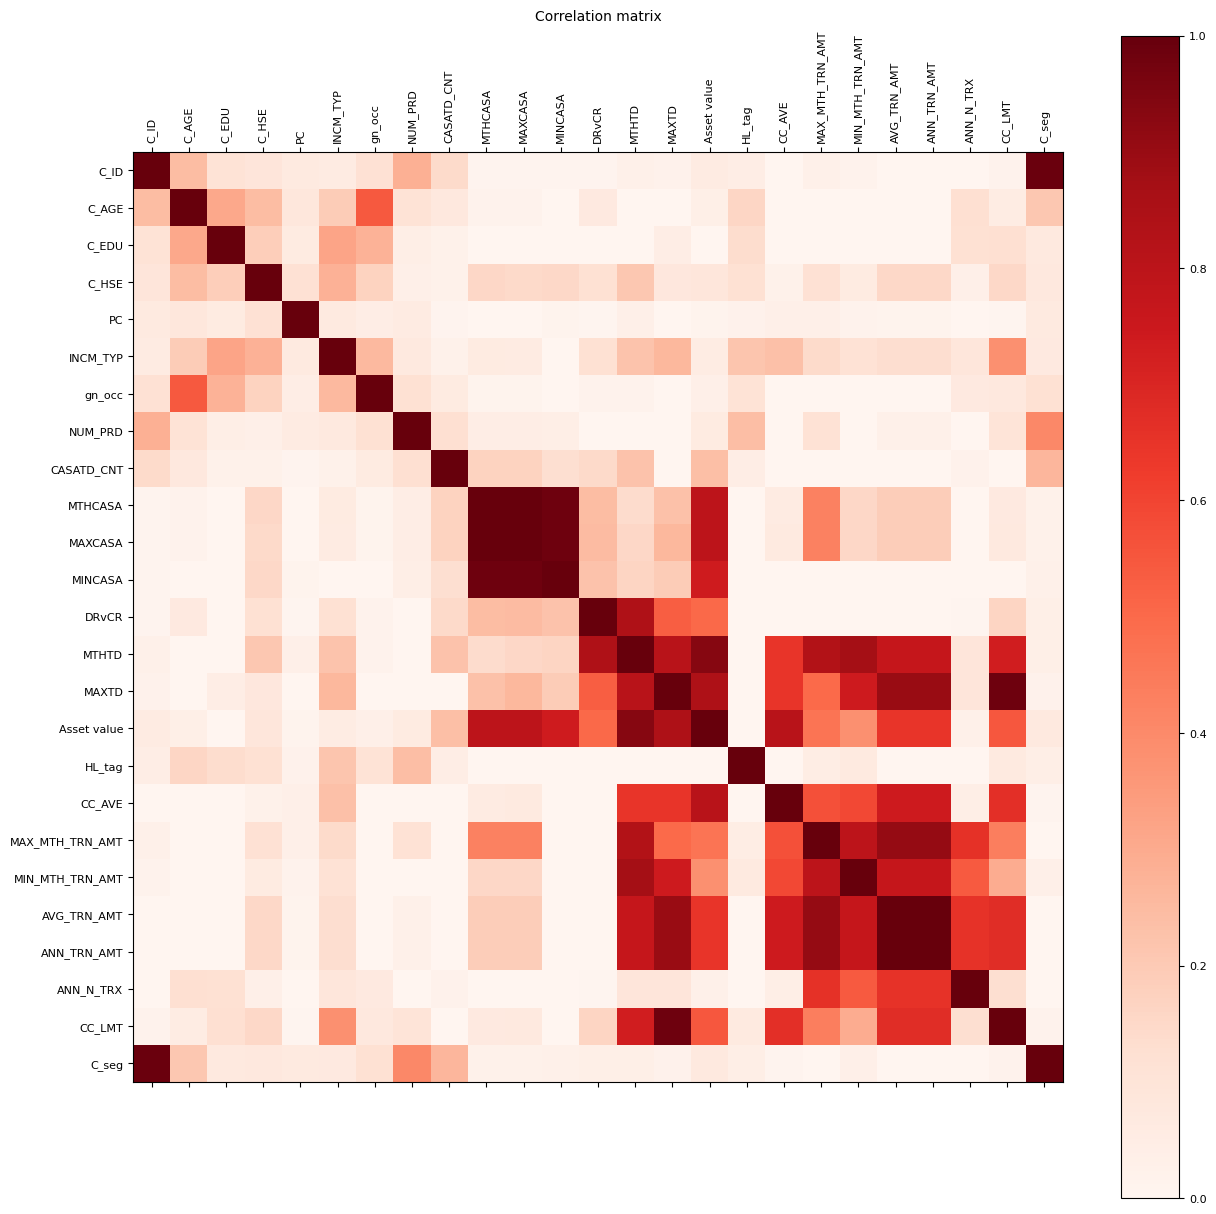

In [148]:
# explore overall correlations
df_corr = df_raw.loc[:, [c for c in df_raw.columns if c not in ["AL_tag", "pur_price_avg", "UT_AVE", "MAXUT", "N_FUNDS"]]]
phik_overview = df_corr.phik_matrix(interval_cols=interval_cols)
f = plt.figure(figsize=(15, 15))
plt.matshow(phik_overview, fignum=f.number, cmap="Reds")
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8, rotation=90)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation matrix', fontsize=10)

In [149]:
# C_seg is relatively more correlated with C_AGE, gn_occ, NUM_PRD, CASATD_CNT

In [150]:
# convert categorical to string
for col in (nominal + ordinal):
    df_raw[col] = df_raw[col].astype(str)

df_raw.head(2)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,0,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT


In [151]:
# After converting, np.nan has been converted to string as well
df_raw.loc[(df_raw.isin(["nan", "NaN", "NA", "Nan", "Nill", "NAN"])).any(axis=1)]


,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
2,2,69,A-Levels,nan,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,0.41066,NaN,NaN,64161.74,0.0,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,3,70,nan,nan,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5397.18000,NaN,NaN,39792.30,0.0,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,4,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,nan,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3607.58000,NaN,NaN,67258.47,0.0,0.0,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
5,5,69,nan,nan,30353.0,nan,RETIREE,3,1.0,79945.77,79945.77,79945.77,26.70592,NaN,NaN,129945.77,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
6,6,72,nan,nan,68613.0,nan,RETIREE,5,2.0,10662.29,10652.39,9.90,25290.15000,NaN,NaN,35584.40,0.0,0.0,NaN,24936.747500,25949.96,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66077,66077,32,nan,nan,0.0,nan,PMEB,2,1.0,952.17,952.17,952.17,NaN,NaN,NaN,952.17,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66078,66078,41,nan,nan,70449.0,nan,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66079,66079,39,nan,nan,96290.0,4.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66080,66080,50,nan,nan,69597.0,6.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,1.0,285999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL


In [152]:
# map string back to np.nan
df_raw.replace({"nan": np.nan, "NaN": np.nan, "NAN": np.nan}, inplace=True)

In [153]:
df_raw.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,0,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT
2,2,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,0.0,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,3,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,0.0,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,4,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,0.0,0.0,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


In [187]:
# pd.set_option('display.max_rows', None)

# ft.list_primitives()[ft.list_primitives().type == "transform"]

In [188]:
# based on feature importance graph and corr plot, capture important nuermic columns to expand them
imp_fts = [
 'Asset value',
 'NUM_PRD',
 'MTHCASA',
 'CASATD_CNT',
 'MAXCASA']

es = ft.EntitySet(id='ft')

es = es.add_dataframe(dataframe_name="ft", dataframe=df_raw.loc[:, imp_fts], index=index_col)

# # check avail transform
# ft.list_primitives()[ft.list_primitives().type == "transform"]

features_matrix,feature_names = ft.dfs(
    entityset=es,
    target_dataframe_name='ft',
    trans_primitives=["add_numeric", "subtract_numeric", "divide_numeric",'multiply_numeric'],
    max_depth=2,
    verbose=True)

features_matrix.reset_index(inplace=True)
features_matrix = features_matrix.drop(imp_fts, axis=1)

df_raw = df_raw.merge(features_matrix, how='left', on='C_ID')

df_raw.head()

index C_ID not found in dataframe, creating new integer column
Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created


Built 55 features
Elapsed: 00:00 | Progress: 100%|██████████


,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD
0,0,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,0.0,0.0,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT,111904.91,116795.99,118793.82,111899.91,4907.08,6904.91,11.0,11795.99,4902.08,6899.91,13987.113750,22.840392,16.224209,37298.9700,0.000071,0.001633,0.001160,2.666667,0.043782,612.385000,0.710330,1633.026667,0.061636,862.11375,1.407797,2298.970000,0.000027,0.375000,0.000612,0.000435,895175.28,5.481919e+08,7.717429e+08,335690.73,39192.64,55175.28,24.0,3.378851e+07,14697.24,20690.73,111888.91,106997.83,105000.00,111893.91,-4891.08,-6888.91,5.0,-1997.83,4896.08,6893.91
1,1,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,0.0,0.0,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT,627299.75,663027.30,679001.53,627290.75,35753.55,51727.78,17.0,87455.33,35744.55,51718.78,48252.826923,17.551122,12.129738,156821.6875,0.000021,0.000364,0.000251,3.250000,0.056976,2749.273077,0.691109,8935.137500,0.082442,3978.06000,1.446950,12928.695000,0.000006,0.307692,0.000112,0.000077,8154727.75,2.241957e+10,3.244000e+10,2509147.00,464627.15,672292.14,52.0,1.848315e+09,142962.20,206859.12,627273.75,591546.20,575571.97,627282.75,-35727.55,-51701.78,9.0,-15974.23,35736.55,51710.78
2,2,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,0.0,0.0,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT,64162.74,69581.83,69581.83,64165.74,5421.09,5421.09,5.0,10840.18,5424.09,5424.09,64161.740000,11.837763,11.837763,16040.4350,0.000016,0.000184,0.000184,0.250000,0.084475,5420.090000,1.000000,1355.022500,0.084475,5420.09000,1.000000,1355.022500,0.000062,4.000000,0.000738,0.000738,64161.74,3.477624e+08,3.477624e+08,256646.96,5420.09,5420.09,4.0,2.937738e+07,21680.36,21680.36,64160.74,58741.65,58741.65,64157.74,-5419.09,-5419.09,-3.0,0.00,5416.09,5416.09
3,3,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,0.0,0.0,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT,39793.30,53388.95,53388.95,39795.30,13597.65,13597.65,4.0,27193.30,13599.65,13599.65,39792.300000,2.926625,2.926625,13264.1000,0.000025,0.000074,0.000074,0.333333,0.341690,13596.650000,1.000000,4532.216667,0.341690,13596.65000,1.000000,4532.216667,0.000075,3.000000,0.000221,0.000221,39792.30,5.410420e+08,5.410420e+08,119376.90,13596.65,13596.65,3.0,1.848689e+08,40789.95,40789.95,39791.30,26195.65,26195.65,39789.30,-13595.65,-13595.65,-2.0,0.00,13593.65,13593.65
4,4,72,O-Levels,EXECUTIVE CONDOMINIUM,

In [202]:
df_raw.describe()

invalid value encountered in subtract


,C_ID,C_AGE,PC,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD
count,66083.000000,66083.000000,65597.000000,66083.000000,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,2.970800e+04,1.410000e+04,1.410000e+04,6.608300e+04,5.585000e+03,2.678000e+03,2.678000e+03,2678.000000,17073.000000,11733.000000,11733.000000,11733.000000,1.173300e+04,11733.000000,47744.000000,4.099100e+04,3.904500e+04,3.904500e+04,6.608300e+04,3.904500e+04,3.904500e+04,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,4.099100e+04,3.881900e+04,3.881900e+04,6.608300e+04,4.099100e+04,3.904500e+04,3.904500e+04,40991.000000,38819.00000,3.904500e+04,38813.000000,3.904500e+04,3.881900e+04,3.904500e+04,38813.000000,3.904500e+04,6.608300e+04,40991.000000,3.904500e+04,3.904500e+04,4.099100e+04,3.904500e+04,3.904500e+04,6.608300e+04,3.904500e+04,3.904500e+04,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,4.099100e+04,3.904500e+04,3.904500e+04,6.608300e+04,3.904500e+04,3.904500e+04,40991.000000,39045.000000,3.904500e+04,3.904500e+04
mean,33041.000000,52.357429,43249.703264,2.097983,1.727867,1.614598e+04,1.544520e+04,1.317587e+04,3.663201e+04,1.075480e+05,6.738959e+04,3.606658e+04,1.247173e+05,4.562678e+04,5.207089e+04,1.447722,1433.442515,2812.945083,382.766932,848.137686,1.017765e+04,64.922952,5408.238040,5.777673e+04,7.199983e+04,7.270061e+04,3.606868e+04,1.544694e+04,1.614772e+04,4.330731,3.159119e+04,1.544787e+04,1.614865e+04,2.679389e+04,inf,inf,1.399419e+04,inf,inf,inf,0.711595,-inf,1.078979e+04,0.974118,6.424287e+03,-inf,1.101890e+04,1.045541,6.671093e+03,inf,1.901875,inf,inf,2.011350e+05,6.123162e+09,6.347121e+09,1.103409e+05,3.408306e+04,3.697136e+04,4.950599,4.576243e+09,4.412450e+04,4.643743e+04,5.777328e+04,4.110942e+04,4.040865e+04,3.606448e+04,-1.544347e+04,-1.614425e+04,-0.874997,-700.778417,1.544254e+04,1.614332e+04
std,19076.663256,14.323447,25671.057340,1.093081,1.411307,6.683559e+04,6.505494e+04,5.443935e+04,1.330104e+05,1.770551e+05,1.166629e+05,1.161096e+05,8.775365e+04,5.447327e+04,6.140188e+04,0.920481,5016.886579,7971.455090,1028.178858,2690.348744,3.228418e+04,85.592620,13220.464962,1.430466e+05,1.878529e+05,1.894525e+05,1.161099e+05,6.505506e+04,6.683572e+04,1.993789,1.317311e+05,6.505499e+04,6.683564e+04,6.131482e+04,NaN,NaN,4.885659e+04,NaN,NaN,NaN,0.550133,NaN,4.325449e+04,0.097956,3.003006e+04,NaN,4.348463e+04,0.199321,3.047031e+04,NaN,0.935345,NaN,NaN,9.647469e+05,2.849291e+11,2.871919e+11,4.103801e+05,3.458548e+05,3.896690e+05,5.519733,2.636145e+11,2.614280e+05,2.695974e+05,1.430452e+05,1.195388e+05,1.189778e+05,1.161093e+05,6.505483e+04,6.683546e+04,1.470499,6722.341464,6.505490e+04,6.683554e+04
min,0.000000,2.000000,0.000000,1.000000,1.000000,-2.094051e+05,-2.094051e+05,-2.094051e+05,0.000000e+00,7.976200e+02,7.976200e+02,0.000000e+00,1.360000e+04,6.750000e-02,7.000000

In [203]:
df_raw.replace([np.inf, -np.inf], np.nan, inplace=True)

In [204]:
# drop the customer_id
df_X = df_raw.drop([index_col, "PC", target_name], axis=1)
df_y = df_raw.loc[:, [target_name]]

In [205]:
# train, val, test split
X, X_test, y, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=1, shuffle=True, stratify=df_y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1, shuffle=True, stratify=y)

display(f"train set size: {X_train.shape}, val set size: {X_val.shape}, test set size: {X_test.shape}")

'train set size: (47579, 77), val set size: (5287, 77), test set size: (13217, 77)'

In [206]:
# get cols requiring onehotencoding
categorical = [col for col in (ordinal + nominal) if col != target_name]
display(f"the categorical variables that need one hot encoding are: {categorical}")

# apply onehotencoding for categorical variables
enc = OneHotEncoder(handle_unknown='error', sparse_output=False, drop=None)
enc.fit_transform(df_X.loc[:, categorical])
feature_labels = enc.get_feature_names_out()


feature_arr = enc.transform(X[categorical])
cat_X = pd.DataFrame(feature_arr, columns=feature_labels).reset_index(drop=True)
X = pd.concat([X.drop(categorical, axis=1).reset_index(drop=True), cat_X], axis=1)

# for training data
feature_arr = enc.transform(X_train[categorical])
cat_train = pd.DataFrame(feature_arr, columns=feature_labels).reset_index(drop=True)
X_train = pd.concat([X_train.drop(categorical, axis=1).reset_index(drop=True), cat_train], axis=1)
display("training data after onehot encoding:", X_train.head())

feature_arr = enc.transform(X_val[categorical])
cat_val = pd.DataFrame(feature_arr, columns=feature_labels).reset_index(drop=True)
X_val = pd.concat([X_val.drop(categorical, axis=1).reset_index(drop=True), cat_val], axis=1)
display("val data after onehot encoding:", X_val.head())

feature_arr = enc.transform(X_test[categorical])
cat_test = pd.DataFrame(feature_arr, columns=feature_labels).reset_index(drop=True)
X_test = pd.concat([X_test.drop(categorical, axis=1).reset_index(drop=True), cat_test], axis=1)
display("test data after onehot encoding:", X_test.head())

"the categorical variables that need one hot encoding are: ['INCM_TYP', 'C_EDU', 'C_HSE', 'gn_occ', 'HL_tag', 'AL_tag']"

'training data after onehot encoding:'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
0,49,2,1.0,38.28,38.28,38.28,6546.29,NaN,NaN,38.28,NaN,NaN,NaN,NaN,311.788333,2521.93,41.86,435.558333,5226.70,40.0,10000.0,39.28,76.56,76.56,40.28,39.28,39.28,3.0,76.56,40.28,40.28,38.280,1.000000,1.000000,19.140000,0.026123,0.026123,0.026123,0.500000,1.000000,38.280,1.0,19.140000,1.000000,38.280,1.0,19.140000,0.052247,2.0,0.052247,0.052247,38.28,1.465358e+03,1.465358e+03,76.56,38.28,38.28,2.0,1.465358e+03,76.56,76.56,37.28,0.00,0.00,36.28,-37.28,-37.28,-1.0,0.0,36.28,36.28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,53,3,1.0,321.88,321.88,321.88,1380.89,NaN,NaN,326.90,NaN,NaN,NaN,NaN,23.200000,NaN,NaN,NaN,NaN,NaN,8000.0,327.90,648.78,648.78,329.90,322.88,322.88,4.0,643.76,324.88,324.88,326.900,1.015596,1.015596,108.966667,0.003059,0.003107,0.003107,0.333333,0.984644,321.880,1.0,107.293333,0.984644,321.880,1.0,107.293333,0.009177,3.0,0.009320,0.009320,326.90,1.052226e+05,1.052226e+05,980.70,321.88,321.88,3.0,1.036067e+05,965.64,965.64,325.90,5.02,5.02,323.90,-320.88,-320.88,-2.0,0.0,318.88,318.88,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,49,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.69,NaN,NaN,NaN,NaN,4.750000,42.84,42.84,3.570000,42.84,1.0,25000.0,NaN,NaN,NaN,57.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.845000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035913,NaN,NaN,NaN,NaN,NaN,NaN,111.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.69,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,17,2,2.0,2001.01,2001.01,2001.01,4405.90,20000.0,20000.0,22001.01,NaN,NaN,NaN,Na

'val data after onehot encoding:'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
0,52,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,35,3,1.0,1347.65,1347.65,1347.65,16492.00,NaN,NaN,1347.65,89000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1348.65,2695.30,2695.30,1350.65,1348.65,1348.65,4.0,2695.30,1350.65,1350.65,1347.650,1.000000,1.0,449.216667,0.000742,0.000742,0.000742,0.333333,1.000000,1347.65,1.000000,449.216667,1.0,1347.650,1.000000,449.216667,0.002226,3.0,0.002226,0.002226,1347.65,1.816161e+06,1.816161e+06,4042.95,1347.65,1347.65,3.0,1.816161e+06,4042.95,4042.95,1346.65,0.00,0.0,1344.65,-1346.65,-1346.65,-2.0,0.00,1344.65,1344.65,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,60,3,1.0,521.86,521.86,521.86,4036.00,NaN,NaN,521.86,NaN,NaN,NaN,NaN,417.663333,452.51,65.86,298.774167,3585.29,137.0,4000.0,522.86,1043.72,1043.72,524.86,522.86,522.86,4.0,1043.72,524.86,524.86,521.860,1.000000,1.0,173.953333,0.001916,0.001916,0.001916,0.333333,1.000000,521.86,1.000000,173.953333,1.0,521.860,1.000000,173.953333,0.005749,3.0,0.005749,0.005749,521.86,2.723379e+05,2.723379e+05,1565.58,521.86,521.86,3.0,2.723379e+05,1565.58,1565.58,520.86,0.00,0.0,518.86,-520.86,-520.86,-2.0,0.00,518.86,518.86,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,35,2,1.0,607.44,607.44,607.44,14927.36,NaN,NaN,60

'test data after onehot encoding:'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,INCM_TYP_nan,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_EDU_nan,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,C_HSE_nan,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,gn_occ_nan,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
0,42,1,1.0,6971.20,6971.20,6971.20,84292.61,NaN,NaN,6971.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6972.20,13942.40,13942.40,6972.20,6972.20,6972.20,2.0,13942.40,6972.20,6972.20,6971.20,1.0,1.0,6971.20,0.000143,0.000143,0.000143,1.000000,1.0,6971.20,1.0,6971.20,1.0,6971.20,1.0,6971.20,0.000143,1.0,0.000143,0.000143,6971.20,4.859763e+07,4.859763e+07,6971.20,6971.20,6971.20,1.0,4.859763e+07,6971.20,6971.20,6970.20,0.0,0.0,6970.20,-6970.20,-6970.20,0.0,0.0,6970.20,6970.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,40,2,1.0,2535.30,2535.30,2535.30,NaN,NaN,NaN,2535.30,NaN,NaN,NaN,NaN,66.325,NaN,NaN,NaN,NaN,NaN,6000.0,2536.30,5070.60,5070.60,2537.30,2536.30,2536.30,3.0,5070.60,2537.30,2537.30,2535.30,1.0,1.0,1267.65,0.000394,0.000394,0.000394,0.500000,1.0,2535.30,1.0,1267.65,1.0,2535.30,1.0,1267.65,0.000789,2.0,0.000789,0.000789,2535.30,6.427746e+06,6.427746e+06,5070.60,2535.30,2535.30,2.0,6.427746e+06,5070.60,5070.60,2534.30,0.0,0.0,2533.30,-2534.30,-2534.30,-1.0,0.0,2533.30,2533.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,40,2,1.0,519.80,519.80,519.80,NaN,NaN,NaN,519.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,520.80,1039.60,1039.60,521.80,520.80,520.80,3.0,1039.60,521.80,521.80,519.80,1.0,1.0,259.90,0.001924,0.001924,0.001924,0.500000,1.0,519.80,1.0,259.90,1.0,519.80,1.0,259.90,0.003848,2.0,0.003848,0.003848,519.80,2.701920e+05,2.701920e+05,1039.60,519.80,519.80,2.0,2.701920e+05,1039.60,1039.60,518.80,0.0,0.0,517.80,-518.80,-518.80,-1.0,0.0,517.80,517.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,

In [207]:
# impute missing predictor values with np.nan, so that XGBoost will handle them
X = X.replace(np.nan)
X_train = X_train.replace(np.nan)
X_val = X_val.replace(np.nan)
X_test = X_test.replace(np.nan)

In [208]:
# onehotencoder will encode the np.nan into a new column
nan_cols = [col for col in X.columns if "_nan" in col]
nan_cols

['INCM_TYP_nan', 'C_EDU_nan', 'C_HSE_nan', 'gn_occ_nan']

In [209]:
def impute_encoded_col(df: pd.DataFrame, col_lst: list) -> pd.DataFrame:
    for col_n in col_lst:
        key = col_n[:-4]
        index =(df.loc[df[col_n] == 1]).index

        # drop column
        df.drop(col_n, axis=1, inplace=True)

        # impute with np.nan
        df.loc[index, [col for col in df.columns if key in col]] = np.nan

    return df

X = impute_encoded_col(X, nan_cols)

X_train = impute_encoded_col(X_train, nan_cols)
display("train set after imputing:", X_train.sample(1))

X_val = impute_encoded_col(X_val, nan_cols)
display("val set after imputing:", X_val.sample(1))

X_test = impute_encoded_col(X_test, nan_cols)
display("test set after imputing:", X_test.sample(1))

'train set after imputing:'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
1569,53,1,1.0,4064.39,4064.39,4064.39,2000.0,80000.0,20000.0,0.0,47500.0,37087.055833,38593.95,1.0,0.0,8837.71,83.3,1136.715833,13640.59,10.0,0.0,4065.39,8128.78,8128.78,1.0,4065.39,4065.39,3.0,8128.78,4066.39,4066.39,4064.39,1.0,1.0,0.0,0.000246,0.000246,0.000246,0.5,1.0,4064.39,1.0,2032.195,1.0,4064.39,1.0,2032.195,0.000492,2.0,0.000492,0.000492,4064.39,1.651927e+07,1.651927e+07,0.0,4064.39,4064.39,2.0,1.651927e+07,8128.78,8128.78,4063.39,0.0,0.0,-1.0,-4063.39,-4063.39,-1.0,0.0,4062.39,4062.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


'val set after imputing:'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
5067,59,1,1.0,1448.93,1448.93,1448.93,30701.98,10000.0,10000.0,0.0,121300.0,9783.528333,10136.01,4.0,24.546667,134.34,25.37,20.108333,241.3,3.0,5000.0,1449.93,2897.86,2897.86,1.0,1449.93,1449.93,3.0,2897.86,1450.93,1450.93,1448.93,1.0,1.0,0.0,0.00069,0.00069,0.00069,0.5,1.0,1448.93,1.0,724.465,1.0,1448.93,1.0,724.465,0.00138,2.0,0.00138,0.00138,1448.93,2.099398e+06,2.099398e+06,0.0,1448.93,1448.93,2.0,2.099398e+06,2897.86,2897.86,1447.93,0.0,0.0,-1.0,-1447.93,-1447.93,-1.0,0.0,1446.93,1446.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


'test set after imputing:'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
7961,53,1,1.0,4523.75,4523.75,4523.75,6000.0,100752.05,50752.05,0.0,185000.0,12415.7025,51844.99,1.0,126.706667,1543.13,17.66,373.465833,4481.59,51.0,5000.0,4524.75,9047.5,9047.5,1.0,4524.75,4524.75,2.0,9047.5,4524.75,4524.75,4523.75,1.0,1.0,0.0,0.000221,0.000221,0.000221,1.0,1.0,4523.75,1.0,4523.75,1.0,4523.75,1.0,4523.75,0.000221,1.0,0.000221,0.000221,4523.75,2.046431e+07,2.046431e+07,0.0,4523.75,4523.75,1.0,2.046431e+07,4523.75,4523.75,4522.75,0.0,0.0,-1.0,-4522.75,-4522.75,0.0,0.0,4522.75,4522.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [210]:
# label encoding for target variable
le = preprocessing.LabelEncoder()

y = pd.DataFrame(le.fit_transform(y[target_name]), columns=["Y"])

y_train = pd.DataFrame(le.transform(y_train[target_name]), columns=["Y"])
display("training after label encoding:", y_train.head())

y_val = pd.DataFrame(le.transform(y_val[target_name]), columns=["Y"])
display("y_val after label encoding:", y_val.head())

y_test = pd.DataFrame(le.transform(y_test[target_name]), columns=["Y"])
display("y_test after label encoding:", y_test.head())

'training after label encoding:'

,Y
0,1
1,1
2,1
3,1
4,1


'y_val after label encoding:'

,Y
0,1
1,0
2,1
3,1
4,1


'y_test after label encoding:'

,Y
0,1
1,1
2,1
3,1
4,0


In [211]:
# standardize X
scaler = StandardScaler()
feature_arr = scaler.fit_transform(X.values)
X = pd.DataFrame(feature_arr, index=X.index, columns=X.columns)

feature_arr = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(feature_arr, index=X_train.index, columns=X_train.columns)
display("train dataset after scaling", X_train.head())

feature_arr = scaler.transform(X_val.values)
X_val = pd.DataFrame(feature_arr, index=X_val.index, columns=X_val.columns)
display("val dataset after scaling", X_val.head())

feature_arr = scaler.transform(X_test.values)
X_test = pd.DataFrame(feature_arr, index=X_test.index, columns=X_test.columns)
display("test dataset after scaling", X_test.head())

'train dataset after scaling'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
0,-0.236422,-0.086879,-0.512132,-0.248662,-0.243530,-0.249726,-0.233868,NaN,NaN,-0.302332,NaN,NaN,NaN,NaN,-0.233658,-0.031197,-0.310286,-0.132048,-0.132048,-0.279494,0.345284,-0.396946,-0.385584,-0.386503,-0.302332,-0.243541,-0.248673,-0.660253,-0.246462,-0.243540,-0.248672,-0.414457,-0.024814,-0.024225,-0.271221,0.009987,0.008562,0.008837,-0.392153,0.781196,-0.243889,0.263782,-0.181075,0.737184,-0.247271,-0.227032,-0.185303,-0.035480,0.120119,0.007463,0.007570,-0.209130,-0.022549,-0.023297,-0.266455,-0.164675,-0.172445,-0.522823,-0.018199,-0.198886,-0.204273,-0.396940,-0.338764,-0.334204,-0.302332,0.243519,0.248651,-0.096341,0.104904,-0.243520,-0.248652,-0.267478,-0.573796,-0.418899,2.301081,-0.437099,-0.468305,-0.175222,-0.086007,-0.214323,-0.123981,-0.826306,-0.546038,3.083271,-0.406474,-0.192475,-0.116277,-0.115835,-0.079275,-0.053671,-0.007902,-0.066731,-0.069959,0.67521,-0.066258,-0.007902,-0.007902,0.0,-0.067202,-0.429991,-0.344837,-0.081627,-0.153359,-0.360042,-0.316194,-0.310248,0.931298,-0.283209,-0.137186,-0.291464,0.191847,-0.191847,0.303914,-0.303914
1,0.043011,0.832518,-0.512132,-0.244317,-0.239076,-0.244311,-0.274637,NaN,NaN,-0.299913,NaN,NaN,NaN,NaN,-0.297234,-0.031197,-0.310286,-0.132048,-0.132048,-0.279494,0.194297,-0.394967,-0.382520,-0.383462,-0.299905,-0.239088,-0.244328,-0.162760,-0.242057,-0.239071,-0.244312,-0.409987,-0.024793,-0.024205,-0.269484,-0.019656,-0.021002,-0.020728,-0.693461,0.744334,-0.237461,0.263782,-0.178639,0.700481,-0.240896,-0.227032,-0.182905,-0.042203,1.197868,-0.019840,-0.019734,-0.208831,-0.022548,-0.023296,-0.264266,-0.163266,-0.171084,-0.345954,-0.018199,-0.194830,-0.200321,-0.394961,-0.338722,-0.334162,-0.299922,0.239065,0.244306,-0.769543,0.104904,-0.239082,-0.244323,-0.267478,-0.573796,-0.418899,-0.434578,-0.437099,2.135360,-0.175222,-0.086007,-0.214323,-0.123981,1.210206,-0.546038,-0.324331,-0.406474,-0.192475,-0.116277,-0.115835,-0.079275,-0.053671,-0.007902,-0.066731,-0.069959,-1.48102,-0.066258,-

'val dataset after scaling'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
0,-0.026847,-0.086879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.302653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.145424,NaN,NaN,NaN,-0.302653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.271591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.266640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.302653,NaN,NaN,NaN,NaN,NaN,NaN,-0.267478,1.742781,-0.418899,-0.434578,-0.437099,-0.468305,-0.175222,-0.086007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360042,-0.316194,3.223232,-1.073770,-0.283209,-0.137186,-0.291464,0.191847,-0.191847,0.303914,-0.303914
1,-1.214440,0.832518,-0.512132,-0.228602,-0.222967,-0.224727,-0.155369,NaN,NaN,-0.291359,-0.408271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.409651,-0.387968,-0.371563,-0.372588,-0.291351,-0.222979,-0.228613,-0.162760,-0.226126,-0.222962,-0.228596,-0.394176,-0.024814,-0.024225,-0.262903,-0.022634,-0.024039,-0.023766,-0.693461,0.781196,-0.214208,0.263782,-0.169190,0.737184,-0.217839,-0.227032,-0.173601,-0.043288,1.197868,-0.024352,-0.024246,-0.207776,-0.022542,-0.023290,-0.256853,-0.158171,-0.166164,-0.345954,-0.018191,-0.180790,-0.186642,-0.387962,-0.338764,-0.334204,-0.291368,0.222956,0.228591,-0.769543,0.104904,-0.222973,-0.228607,-0.267478,-0.573796,-0.418899,2.301081,-0.437099,-0.468305,-0.175222,-0.086007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360042,-0.316194,-0.310248,0.931298,-0.283209,-0.137186,-0.291464,0.191847,-0.191847,-3.290402,3.290402
2,0.532020,0.832518,-0.512132,-0.241253,-0.235936,-0.240493,-0.253681,NaN,NaN,-0.298280,-0.408271,NaN,NaN,NaN,-0.210333,-0.260825,-0.288136,-0.174966,-0.174966,0.850102,-0.107677,-0.393630,-0.380406,-0.381364,-0.298271,-0.235947,-0.241264,-0.162760,-0.238951,-0.235930,-0.241248,-0.406967,-0.024814,-0.024225,-0.268227,-0.021125,-0.022531,-0.022257,-0.693461,0.781196,-0.232927,0.263782,-0.176797,0.737184,-0.236401,-0.227032,-0.181091,-0.042738,1.

'test dataset after scaling'

,C_AGE,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,Asset value + CASATD_CNT,Asset value + MAXCASA,Asset value + MTHCASA,Asset value + NUM_PRD,CASATD_CNT + MAXCASA,CASATD_CNT + MTHCASA,CASATD_CNT + NUM_PRD,MAXCASA + MTHCASA,MAXCASA + NUM_PRD,MTHCASA + NUM_PRD,Asset value / CASATD_CNT,Asset value / MAXCASA,Asset value / MTHCASA,Asset value / NUM_PRD,CASATD_CNT / Asset value,CASATD_CNT / MAXCASA,CASATD_CNT / MTHCASA,CASATD_CNT / NUM_PRD,MAXCASA / Asset value,MAXCASA / CASATD_CNT,MAXCASA / MTHCASA,MAXCASA / NUM_PRD,MTHCASA / Asset value,MTHCASA / CASATD_CNT,MTHCASA / MAXCASA,MTHCASA / NUM_PRD,NUM_PRD / Asset value,NUM_PRD / CASATD_CNT,NUM_PRD / MAXCASA,NUM_PRD / MTHCASA,Asset value * CASATD_CNT,Asset value * MAXCASA,Asset value * MTHCASA,Asset value * NUM_PRD,CASATD_CNT * MAXCASA,CASATD_CNT * MTHCASA,CASATD_CNT * NUM_PRD,MAXCASA * MTHCASA,MAXCASA * NUM_PRD,MTHCASA * NUM_PRD,Asset value - CASATD_CNT,Asset value - MAXCASA,Asset value - MTHCASA,Asset value - NUM_PRD,CASATD_CNT - MAXCASA,CASATD_CNT - MTHCASA,CASATD_CNT - NUM_PRD,MAXCASA - MTHCASA,MAXCASA - NUM_PRD,MTHCASA - NUM_PRD,INCM_TYP_1.0,INCM_TYP_2.0,INCM_TYP_3.0,INCM_TYP_4.0,INCM_TYP_5.0,INCM_TYP_6.0,INCM_TYP_7.0,INCM_TYP_8.0,C_EDU_A-Levels,C_EDU_Below O-Levels,C_EDU_Degree,C_EDU_Diploma,C_EDU_Masters,C_EDU_O-Levels,C_EDU_Others,C_EDU_PHD/Doctorate,C_EDU_Professional Qualifications,C_EDU_Technical/Vocational Qualifications,C_HSE_BUNGALOW,C_HSE_COMMERICAL BUILDING,C_HSE_EXECUTIVE CONDOMINIUM,C_HSE_HDB 1-3 ROOM,C_HSE_HDB 4-5 ROOM,C_HSE_HDB EXECUTIVE APARTMENT/ MANSIONETTE,C_HSE_HOTEL/ SERVICE APARTMENT,C_HSE_INDUSTRIAL BUILDING,C_HSE_OFFICE,C_HSE_PRIVATE APARTMENT,C_HSE_PRIVATE CONDOMINIUM,C_HSE_SEMI-DETACHED,C_HSE_SHOPHOUSE,C_HSE_TERRACE,gn_occ_BLUE COLLAR,gn_occ_HOUSEWIFE,gn_occ_OTHERS,gn_occ_PMEB,gn_occ_RETIREE,gn_occ_STUDENT,gn_occ_WHITE COLLAR,HL_tag_0.0,HL_tag_1.0,AL_tag_0.0,AL_tag_1.0
0,-0.725431,-1.006276,-0.512132,-0.142447,-0.134654,-0.117363,0.379762,NaN,NaN,-0.244233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.349409,-0.311342,-0.312824,-0.244242,-0.134665,-0.142458,-1.157745,-0.138786,-0.134680,-0.142472,-0.307070,-0.024814,-0.024225,-0.136757,-0.023404,-0.024808,-0.024535,0.511770,0.781196,-0.086733,0.263782,0.011053,0.737184,-0.091435,-0.227032,0.003864,-0.043613,-0.957629,-0.025677,-0.025571,-0.201963,-0.022364,-0.023113,-0.249765,-0.130237,-0.139188,-0.699693,-0.017997,-0.167430,-0.173625,-0.349402,-0.338764,-0.334204,-0.244225,0.134642,0.142435,0.576860,0.104904,-0.134628,-0.142421,-0.267478,-0.573796,-0.418899,-0.434578,-0.437099,-0.468305,5.707059,-0.086007,-0.214323,-0.123981,-0.826306,-0.546038,3.083271,-0.406474,-0.192475,-0.116277,-0.115835,-0.079275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360042,-0.316194,-0.310248,0.931298,-0.283209,-0.137186,-0.291464,0.191847,-0.191847,0.303914,-0.303914
1,-0.865148,-0.086879,-0.512132,-0.210406,-0.204316,-0.202053,0.379762,NaN,NaN,-0.281407,NaN,NaN,NaN,NaN,-0.287734,NaN,NaN,NaN,NaN,NaN,0.043310,-0.379825,-0.358845,-0.359966,-0.281407,-0.204328,-0.210418,-0.660253,-0.207680,-0.204326,-0.210416,-0.375780,-0.024814,-0.024225,-0.247073,-0.023081,-0.024486,-0.024212,-0.392153,0.781196,-0.187286,0.263782,-0.146571,0.737184,-0.191144,-0.227032,-0.151331,-0.043512,0.120119,-0.025266,-0.025160,-0.206548,-0.022524,-0.023272,-0.254365,-0.152272,-0.160467,-0.522823,-0.018172,-0.176101,-0.182074,-0.379818,-0.338764,-0.334204,-0.281407,0.204305,0.210395,-0.096341,0.104904,-0.204306,-0.210397,-0.267478,1.742781,-0.418899,-0.434578,-0.437099,-0.468305,-0.175222,-0.086007,-0.214323,-0.123981,1.210206,-0.546038,-0.324331,-0.406474,-0.192475,-0.116277,-0.115835,-0.079275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360042,-0.316194,-0.310248,0.931298,-0.283209,-0.137186,-0.291464,0.191847,-0.191847,0.303914,-0.303914
2,-0.865148,-0.086879,-0.512132,-0.241285,

In [212]:
# calculate sample weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

# parameters
objective='binary:logistic'
booster = "gbtree"
eval_metric="logloss"
early_stopping_rounds = 5

In [213]:
# %%time

# # Finetune Hyperparameters
# params = {
#     "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9],
#     "gamma": uniform(0.3, 0.7),
#     "max_depth": [6, 7, 8, 9, 10],
#     "n_estimators": randint(30, 80),
#     "subsample": [0.6, 0.7, 0.8, 0.9],
#     "min_child_weight": [1, 1.5, 2, 2.5, 3],
#     "eta": [0.3, 0.1, 0.05],
# }

# k = StratifiedKFold(n_splits=3, shuffle=False)
# scoring="f1"

# cv_model = xgb.XGBClassifier(
#     objective=objective,
#     tree_method= "auto",
#     eval_metric=eval_metric,
#     booster = booster)

# search = RandomizedSearchCV(
#     cv_model,
#     param_distributions=params,
#     scoring=scoring,
#     random_state=1,
#     n_iter=100,  # No. of combinations / fold
#     cv=k,
#     verbose=1,
#     n_jobs=1,
#     return_train_score=True,
#     refit=False,  # refit by manual as we need to plot the train-val curve to see overfitting problem
#     )

# search.fit(X_train, y_train, sample_weight=sample_weights)
# cv_results =  pd.DataFrame(search.cv_results_).loc[:, ["rank_test_score", "mean_test_score", "params"]].sort_values(by=["rank_test_score"])
# cv_results.head(5)

# # show the best set of hyperparams
# search.best_params_

[0]	validation_0-logloss:0.55738	validation_1-logloss:0.56840
[1]	validation_0-logloss:0.47676	validation_1-logloss:0.50010
[2]	validation_0-logloss:0.42525	validation_1-logloss:0.45765
[3]	validation_0-logloss:0.38825	validation_1-logloss:0.43093
[4]	validation_0-logloss:0.36117	validation_1-logloss:0.41465
[5]	validation_0-logloss:0.33987	validation_1-logloss:0.40134
[6]	validation_0-logloss:0.32414	validation_1-logloss:0.39371
[7]	validation_0-logloss:0.31192	validation_1-logloss:0.38900
[8]	validation_0-logloss:0.30066	validation_1-logloss:0.38423
[9]	validation_0-logloss:0.29028	validation_1-logloss:0.38026
[10]	validation_0-logloss:0.28204	validation_1-logloss:0.37794
[11]	validation_0-logloss:0.27401	validation_1-logloss:0.37513
[12]	validation_0-logloss:0.26800	validation_1-logloss:0.37358
[13]	validation_0-logloss:0.26206	validation_1-logloss:0.37088
[14]	validation_0-logloss:0.25634	validation_1-logloss:0.36892
[15]	validation_0-logloss:0.24871	validation_1-logloss:0.36557
[1

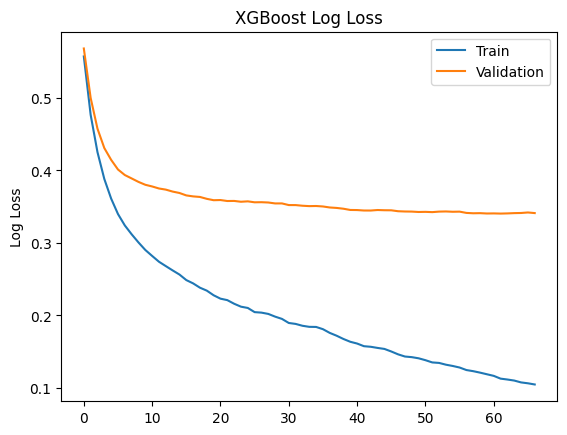

In [214]:
# plot train-val curve to ensure no overfitting
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

colsample_bytree = 0.6
n_estimators = 69
tree_method= "auto"

# tuning parameters
eta = 0.3
max_depth = 10
max_leaves = 2 ** max_depth

# prevent overfitting
min_child_weight = 1.5
gamma = 0.45095519663195377
subsample = 0.9


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBClassifier(
    early_stopping_rounds=early_stopping_rounds,
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    eval_metric=eval_metric,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree)

# Fit the model, val sets are used for early stopping.
result = model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], sample_weight=sample_weights, verbose=True)

# check overfitting
results = result.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [253]:
# finally train with all traing + val, and change to dart booster
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y
)

colsample_bytree = 0.6
n_estimators = 69
tree_method= "auto"
# booster = "dart"  # update booster to dart
booster = "gbtree"

# tuning parameters
eta = 0.3
max_depth = 10
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1.5
gamma = 0.45095519663195377
subsample = 0.9


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBClassifier(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    eval_metric=eval_metric,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree)

model.fit(X, y, sample_weight=sample_weights, verbose=True)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='logloss',
              feature_types=None, gamma=0.45095519663195377, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=1024, min_child_weight=1.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=69,
              n_jobs=None, num_parallel_tree=None, ...)

In [254]:
# predict on test set
preds = model.predict(X_train)

# 0.9130316495873766
f1_score(y_train, preds)

0.928549562235964

In [255]:
# predict on test set
preds = model.predict(X_val)

# 0.9130316495873766
f1_score(y_val, preds)

0.9296394019349165

In [256]:
# predict on test set
preds = model.predict(X_test)

# 0.9196223751544026
f1_score(y_test, preds)

0.9196223751544026

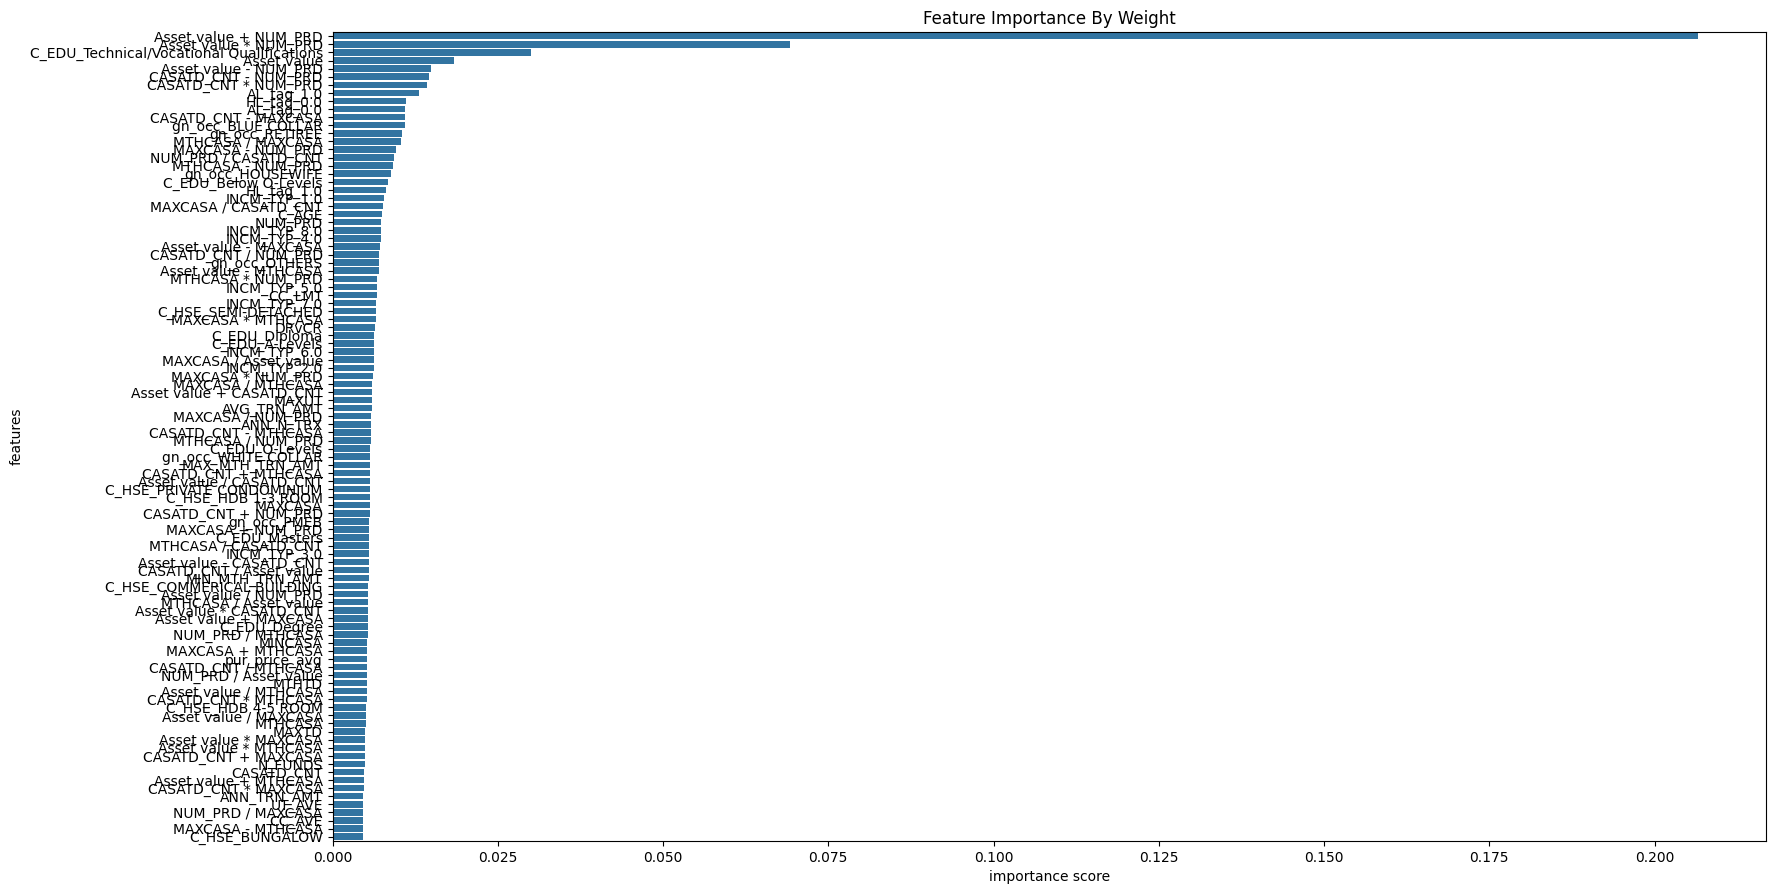

In [219]:
# plot the feature importance
feature_imp = pd.DataFrame(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[0], reverse=True), columns=['Feature', 'Value'])
fig, ax = plt.subplots()

data = feature_imp.sort_values(by="Value", ascending=False).head(100)
fig.set_size_inches(18.5, 10.5)

sns.barplot(x="Value", y="Feature", data=data)
ax.set_title('Feature Importance By Weight')
ax.set_xlabel('importance score')
ax.set_ylabel('features')
ax.yaxis.set_visible(True)
ax.xaxis.set_visible(True)
fig.patch.set_facecolor('white')
# plt.savefig(f'../data/feature_importance_by_weight.png', bbox_inches='tight')

In [257]:
# remove the least significant columns
data.tail(20).Feature.values.tolist()

['MTHTD',
 'Asset value / MTHCASA',
 'CASATD_CNT * MTHCASA',
 'C_HSE_HDB 4-5 ROOM',
 'Asset value / MAXCASA',
 'MTHCASA',
 'MAXTD',
 'Asset value * MAXCASA',
 'Asset value * MTHCASA',
 'CASATD_CNT + MAXCASA',
 'N_FUNDS',
 'CASATD_CNT',
 'Asset value + MTHCASA',
 'CASATD_CNT * MAXCASA',
 'ANN_TRN_AMT',
 'UT_AVE',
 'NUM_PRD / MAXCASA',
 'CC_AVE',
 'MAXCASA - MTHCASA',
 'C_HSE_BUNGALOW']

In [224]:
data.loc[data.Value < 0.01, "Feature"].values.tolist()

['MAXCASA - NUM_PRD',
 'NUM_PRD / CASATD_CNT',
 'MTHCASA - NUM_PRD',
 'gn_occ_HOUSEWIFE',
 'C_EDU_Below O-Levels',
 'HL_tag_1.0',
 'INCM_TYP_1.0',
 'MAXCASA / CASATD_CNT',
 'C_AGE',
 'NUM_PRD',
 'INCM_TYP_8.0',
 'INCM_TYP_4.0',
 'Asset value - MAXCASA',
 'CASATD_CNT / NUM_PRD',
 'gn_occ_OTHERS',
 'Asset value - MTHCASA',
 'MTHCASA * NUM_PRD',
 'INCM_TYP_5.0',
 'CC_LMT',
 'INCM_TYP_7.0',
 'C_HSE_SEMI-DETACHED',
 'MAXCASA * MTHCASA',
 'DRvCR',
 'C_EDU_Diploma',
 'C_EDU_A-Levels',
 'INCM_TYP_6.0',
 'MAXCASA / Asset value',
 'INCM_TYP_2.0',
 'MAXCASA * NUM_PRD',
 'MAXCASA / MTHCASA',
 'Asset value + CASATD_CNT',
 'MAXUT',
 'AVG_TRN_AMT',
 'MAXCASA / NUM_PRD',
 'ANN_N_TRX',
 'CASATD_CNT - MTHCASA',
 'MTHCASA / NUM_PRD',
 'C_EDU_O-Levels',
 'gn_occ_WHITE COLLAR',
 'MAX_MTH_TRN_AMT',
 'CASATD_CNT + MTHCASA',
 'Asset value / CASATD_CNT',
 'C_HSE_PRIVATE CONDOMINIUM',
 'C_HSE_HDB 1-3 ROOM',
 'MAXCASA',
 'CASATD_CNT + NUM_PRD',
 'gn_occ_PMEB',
 'MAXCASA + NUM_PRD',
 'C_EDU_Masters',
 'MTHCASA / 

In [173]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

[18:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


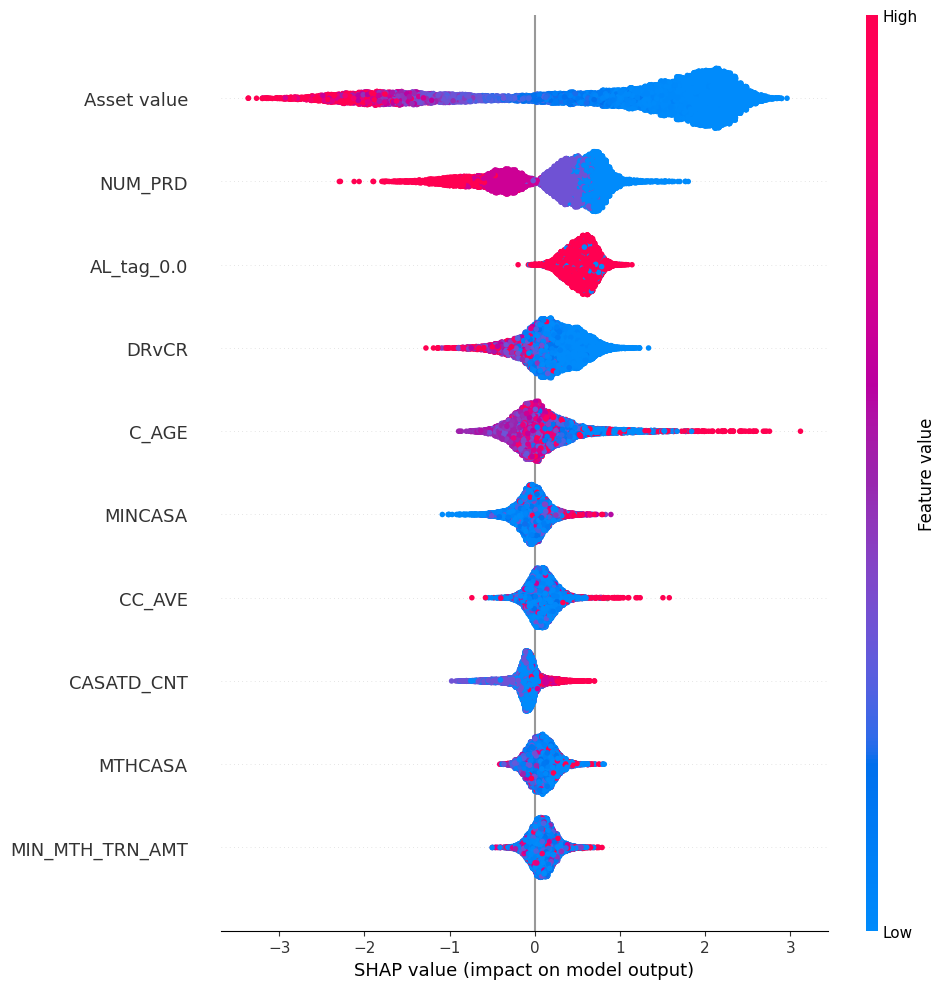

In [175]:
shap.summary_plot(shap_values.values, X_test, max_display=10, show=False, plot_type="dot", plot_size=[10,10])
